In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# # Where to save the figures
# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "ann"

# def save_fig(fig_id, tight_layout=True):
#     path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format='png', dpi=300)

本章将通过第一个ANN架构的快速教程来介绍人工神经网络。然后会展示多层感知器(MLP)并用TensorFlow来实现MLP，并用其来解决MNIST数字分类问题

## 生物神经元到人工神经元

早在1943年，就有人提出了ANN。直到上个世纪60年代，ANN进入黑暗时期。上个世纪80年代，新网络架构的发明和更好的训练技术的发展，ANN经历第二次新盛。上个世纪90年代，更强大的机器学习技术：比如SVM，让ANN再次经历寒冬。这就是ANN的三起三伏。如今，ANN迎来了第四次高潮，这次：
* 有海量数据，并且ANN比ML效果好
* 运算力飞涨
* 训练算法提升
* ANN的理论限制被证明可以被接受:局部最优逼近全局最优
* ANN进入良性循环，持续有资金和技术进步

## 生物神经元

超级复杂的计算可以通过简单的神经元来实现。

## 具有神经元的逻辑运算

Warren McCulloch和Walter Pitts提出了生物神经元的简化模型，由多个二进制输入和一个二进制输出组成。

## 感知器

感知器是最简单的ANN架构，与1957年Frank Rosenblatt发明，基于稍微不同的线性阈值单元(LTU)的人工神经元：输入和输出都是数字，采用越阶函数产生输出。

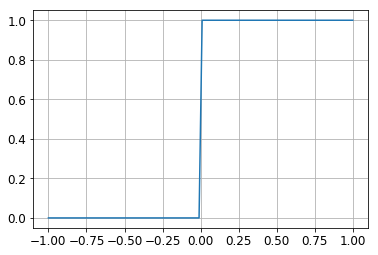

In [17]:
t_x=np.linspace(-1,1,100)
t_y=np.linspace(-1,1,100)
t_y[t_x>=0]=1
t_y[t_x<0]=0
plt.plot(t_x,t_y)
plt.grid()
plt.show()

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

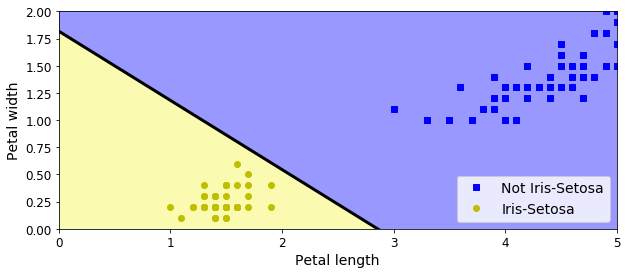

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

感知器的边界是线性的，所以无法学习复杂的模式。

## 多层感知器和反向传播

一个MLP包含一个输入层，一个或多个被称为隐藏层的LTU层(感知器就是个单层的LTU)，以及一个被称为输出层的LTU组成，被称为深度神经网络(DNN)。

多年来，研究者都为如何训练MLP而头疼，直到1986年 D.E.Rumelhart发表了介绍反向传播的训练算法。

简而言之：对于每个训练实例，反向传播算法先做一次预测(正向过程),度量误差,然后反向传播遍历每个层次来度量每个连接的误差贡献度(反向传播),最后再微调每个连接的权重来降低误差(梯度下降).

为了实现这一点，作者将越阶函数改成了逻辑函数，也就是sigmoid函数。

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

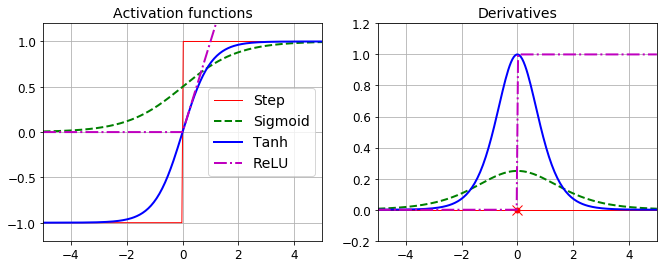

In [19]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

多层感知器实现异或操作

In [20]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    # w1x1+w2x2+b
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

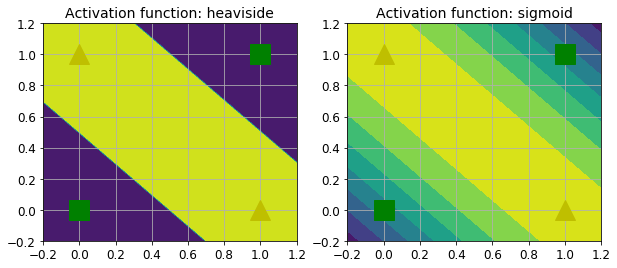

In [21]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
# 越界函数
z1 = mlp_xor(x1, x2, activation=heaviside)
# sigmoid函数
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

然而，现在看来，sigmoid虽然类比神经元机制，却通常远不如relu函数作为激活函数的效果。

# 用TensorFlow的高级API来训练MLP

In [22]:
import tensorflow as tf

In [23]:
# tf.keras.datasets.mnist 加载数据集
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# 归一化
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [24]:
# 特征数
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
# 带有两个隐藏层 一个 300 另一个 100
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)
# 定义输入
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sha\\AppData\\Local\\Temp\\tmp_c1hsonz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002398163E978>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To co

INFO:tensorflow:global_step/sec: 295.774
INFO:tensorflow:loss = 5.0399175, step = 5300 (0.339 sec)
INFO:tensorflow:global_step/sec: 291.89
INFO:tensorflow:loss = 0.935374, step = 5400 (0.342 sec)
INFO:tensorflow:global_step/sec: 293.179
INFO:tensorflow:loss = 0.2489064, step = 5500 (0.341 sec)
INFO:tensorflow:global_step/sec: 310.426
INFO:tensorflow:loss = 2.0997431, step = 5600 (0.323 sec)
INFO:tensorflow:global_step/sec: 294.039
INFO:tensorflow:loss = 0.7539865, step = 5700 (0.339 sec)
INFO:tensorflow:global_step/sec: 292.458
INFO:tensorflow:loss = 1.7730542, step = 5800 (0.342 sec)
INFO:tensorflow:global_step/sec: 231.031
INFO:tensorflow:loss = 0.08880376, step = 5900 (0.433 sec)
INFO:tensorflow:global_step/sec: 297.529
INFO:tensorflow:loss = 0.79612917, step = 6000 (0.336 sec)
INFO:tensorflow:global_step/sec: 294.905
INFO:tensorflow:loss = 0.7900723, step = 6100 (0.340 sec)
INFO:tensorflow:global_step/sec: 265.244
INFO:tensorflow:loss = 2.5803416, step = 6200 (0.377 sec)
INFO:tenso

INFO:tensorflow:loss = 0.49934912, step = 13500 (0.331 sec)
INFO:tensorflow:global_step/sec: 294.904
INFO:tensorflow:loss = 0.061592042, step = 13600 (0.340 sec)
INFO:tensorflow:global_step/sec: 300.201
INFO:tensorflow:loss = 0.47615063, step = 13700 (0.332 sec)
INFO:tensorflow:global_step/sec: 283.631
INFO:tensorflow:loss = 0.8707364, step = 13800 (0.354 sec)
INFO:tensorflow:global_step/sec: 306.629
INFO:tensorflow:loss = 0.15100983, step = 13900 (0.325 sec)
INFO:tensorflow:global_step/sec: 285.204
INFO:tensorflow:loss = 0.17956504, step = 14000 (0.352 sec)
INFO:tensorflow:global_step/sec: 294.904
INFO:tensorflow:loss = 0.2634018, step = 14100 (0.338 sec)
INFO:tensorflow:global_step/sec: 308.515
INFO:tensorflow:loss = 0.10911414, step = 14200 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.39
INFO:tensorflow:loss = 0.1130735, step = 14300 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.359
INFO:tensorflow:loss = 0.23959021, step = 14400 (0.319 sec)
INFO:tensorflow:global_step/sec: 3

INFO:tensorflow:loss = 0.015661579, step = 21600 (0.348 sec)
INFO:tensorflow:global_step/sec: 306.764
INFO:tensorflow:loss = 0.06157444, step = 21700 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.61
INFO:tensorflow:loss = 0.08946443, step = 21800 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.388
INFO:tensorflow:loss = 0.031745862, step = 21900 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.39
INFO:tensorflow:loss = 0.044321686, step = 22000 (0.322 sec)
INFO:tensorflow:global_step/sec: 287.283
INFO:tensorflow:loss = 0.1387794, step = 22100 (0.348 sec)
INFO:tensorflow:global_step/sec: 298.414
INFO:tensorflow:loss = 0.092467755, step = 22200 (0.335 sec)
INFO:tensorflow:global_step/sec: 263.168
INFO:tensorflow:loss = 0.19736278, step = 22300 (0.380 sec)
INFO:tensorflow:global_step/sec: 260.749
INFO:tensorflow:loss = 0.029801767, step = 22400 (0.383 sec)
INFO:tensorflow:global_step/sec: 299.837
INFO:tensorflow:loss = 0.11556748, step = 22500 (0.333 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 0.053562224, step = 29700 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.509
INFO:tensorflow:loss = 0.0377179, step = 29800 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.954
INFO:tensorflow:loss = 0.021010216, step = 29900 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.427
INFO:tensorflow:loss = 0.018882263, step = 30000 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.358
INFO:tensorflow:loss = 0.034363274, step = 30100 (0.319 sec)
INFO:tensorflow:global_step/sec: 315.307
INFO:tensorflow:loss = 0.045503728, step = 30200 (0.318 sec)
INFO:tensorflow:global_step/sec: 314.564
INFO:tensorflow:loss = 0.07959866, step = 30300 (0.318 sec)
INFO:tensorflow:global_step/sec: 308.265
INFO:tensorflow:loss = 0.021000093, step = 30400 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.389
INFO:tensorflow:loss = 0.04361881, step = 30500 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.39
INFO:tensorflow:loss = 0.0030237355, step = 30600 (0.321 sec)
INFO:tensorflow:global_st

INFO:tensorflow:global_step/sec: 312.359
INFO:tensorflow:loss = 0.017720884, step = 37800 (0.321 sec)
INFO:tensorflow:global_step/sec: 317.302
INFO:tensorflow:loss = 0.010410863, step = 37900 (0.315 sec)
INFO:tensorflow:global_step/sec: 312.834
INFO:tensorflow:loss = 0.023250883, step = 38000 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.318
INFO:tensorflow:loss = 0.0008262512, step = 38100 (0.317 sec)
INFO:tensorflow:global_step/sec: 309.467
INFO:tensorflow:loss = 0.008755597, step = 38200 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.332
INFO:tensorflow:loss = 0.0035759462, step = 38300 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.321
INFO:tensorflow:loss = 0.0035394926, step = 38400 (0.317 sec)
INFO:tensorflow:global_step/sec: 305.693
INFO:tensorflow:loss = 0.026138827, step = 38500 (0.327 sec)
INFO:tensorflow:global_step/sec: 302.009
INFO:tensorflow:loss = 0.032103024, step = 38600 (0.332 sec)
INFO:tensorflow:global_step/sec: 307.57
INFO:tensorflow:loss = 0.02956484, step

In [25]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-08T11:57:42Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\sha\AppData\Local\Temp\tmp_c1hsonz\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-08-11:57:42
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9811, average_loss = 0.09763209, global_step = 44000, loss = 12.358492
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\sha\AppData\Local\Temp\tmp_c1hsonz\model.ckpt-44000


In [26]:
eval_results

{'accuracy': 0.9811,
 'average_loss': 0.09763209,
 'loss': 12.358492,
 'global_step': 44000}

In [27]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sha\AppData\Local\Temp\tmp_c1hsonz\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -1.3763005,   1.6911447,   0.788135 ,   2.4821305,  -5.9562116,
        -11.075811 , -20.164291 ,  22.201395 ,  -5.5607567,   0.9507999],
       dtype=float32),
 'probabilities': array([5.7588635e-11, 1.2374041e-09, 5.0157922e-10, 2.7291789e-09,
        5.9061843e-13, 3.5309606e-15, 3.9885677e-19, 1.0000000e+00,
        8.7710319e-13, 5.9017907e-10], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object)}

## 用纯TensorFlow训练DNN

如果我们想对网络的架构有更多的控制，可以使用TensorFlow的低级API。在本节，我们会使用低级API构建上面的模型。首先是构建计算图，然后是训练模型。

## 构建阶段

In [29]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [30]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [31]:
# 单层神经网络 X为获取输入维度, n_neurons为神经元个数
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        # 使用截断的正太分布来初始化
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [32]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [43]:
y_train[0]

7

In [33]:
with tf.name_scope("loss"):
    # sparse_softmax_cross_entropy_with_logits 自动做了 softmax和onehot操作
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [34]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [35]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [36]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [37]:
n_epochs = 40
batch_size = 50

In [38]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

## 执行阶段

In [39]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch}) # 等于自动获取默认会话执行 accyracy
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9146
1 Batch accuracy: 0.92 Val accuracy: 0.936
2 Batch accuracy: 0.96 Val accuracy: 0.945
3 Batch accuracy: 0.92 Val accuracy: 0.9512
4 Batch accuracy: 0.98 Val accuracy: 0.9558
5 Batch accuracy: 0.96 Val accuracy: 0.9566
6 Batch accuracy: 1.0 Val accuracy: 0.9612
7 Batch accuracy: 0.94 Val accuracy: 0.9628
8 Batch accuracy: 0.98 Val accuracy: 0.965
9 Batch accuracy: 0.96 Val accuracy: 0.9658
10 Batch accuracy: 0.92 Val accuracy: 0.9686
11 Batch accuracy: 0.98 Val accuracy: 0.9688
12 Batch accuracy: 0.98 Val accuracy: 0.967
13 Batch accuracy: 0.98 Val accuracy: 0.9708
14 Batch accuracy: 1.0 Val accuracy: 0.9712
15 Batch accuracy: 0.94 Val accuracy: 0.973
16 Batch accuracy: 1.0 Val accuracy: 0.9732
17 Batch accuracy: 1.0 Val accuracy: 0.9742
18 Batch accuracy: 1.0 Val accuracy: 0.9744
19 Batch accuracy: 0.98 Val accuracy: 0.975
20 Batch accuracy: 1.0 Val accuracy: 0.9754
21 Batch accuracy: 1.0 Val accuracy: 0.976
22 Batch accuracy: 0.98 Val accurac

In [40]:
file_writer = tf.summary.FileWriter("tf_logs/10dnn", tf.get_default_graph())
file_writer.close()

## 使用神经网络

In [41]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [42]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


## 使用`tf.layers.dense()`改进上面的代码

In [45]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [46]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [48]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
#     y_proba = tf.nn.softmax(logits)
    y_proba = logits

Instructions for updating:
Use keras.layers.dense instead.


In [49]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [50]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [51]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [52]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [53]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9514
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.9622
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9656
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.9686
13 Batch accuracy: 0.98 Validation accuracy: 0.9704
14 Batch accuracy: 1.0 Validation accuracy: 0.9696
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.9726
17 Batch accuracy: 1.0 Validation accuracy: 0.9728
18 Batch accuracy: 0.98 Validation accuracy: 0.9748
19 Batch accuracy: 0.96 Vali

In [54]:
file_writer = tf.summary.FileWriter("tf_logs/10dnn2", tf.get_default_graph())
file_writer.close()

In [55]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [56]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


# 微调神经网络的超参数

神经网络的灵活性也恰好是它的一个短板：太过于灵活，导致有太多超参数需要调整(调参师上线)。不仅仅是可以使用任意的神经网络结构，即使是最简单的MLP，也有很多可以调整的参数：可以修改层数，每层的神经元数，每层用的激活函数类型，初始化逻辑的权重，等等。我们怎么知道那种超参数的组合适合我们呢？

我们可以使用交叉验证，但调整参数过多，训练耗时，几乎不可能；也可以随机搜索；另一个是使用Oscar。

对于缩小搜索空间，了解每个超参数的合理取值会很有帮助。

## 隐藏层的个数

对于很多问题，我们可以从单一的隐藏层开始，而且通常可以有很好的效果。事实上，人们发现，仅有一层隐藏层的MLP都可以建模大部分复杂的函数。很长时间，研究者甚至都以为不需要进一步研究更深的神经网络。不过深层网络比浅层网络有更高的参数效率：深层网络可以用很少的神经元来建模复杂函数，因此训练起来更快。

要理解为什么会这样，设想你被要求用一个绘图软件画一.片森林，但是不允许拷贝粘贴。你只能依次画每一棵树， 每一个枝干，每一片叶子。如果可以先画一片叶子，然后拷贝粘贴成一个枝干，再拷贝粘贴成一棵树， 最后再拷贝粘贴整棵树形成森林，那速度将会大大提高。现实世界的数据往往会按照层次结构组织，而DNN天生的就很擅长处理这种数据:低级隐藏层用以建模低层结构(比如， 各种形状和方向的线段)，中级隐藏层组合这些低层结构来建模中层结构(比如，正方形、圆形等)， 高级隐藏层和输出层组合这些中层结构来建模高层结构(比如， 人脸) 。

分层的架构不但可以帮助DNN更快地归纳出好方案，还可以提高对于新数据集的泛化能力。比如，你已经训练出了一个可以识别人脸的模型，现在你想要训练-个新的模型来识别发型，你可以完全重用第一个模型中的低层神经网络。不必随机初始化新的网络中低层的权重和偏差，你可以直接用第一个网络的低层神经网络。这样新网络无须从头在图片中学习所有低层的结构，而只需要从高层结构学习即可(比如发 型)。

总之，对于大多数问题来说，你都只需要一个或者两个隐藏层来处理(对于MINST数据集，一个拥有数百个神经元的隐藏层就可以达到97%的精度，而用同样数量神经元构建的两层隐藏层就可以获得超过98%的精度，而且训练时间基本相同)。对于更复杂的问题，你可以逐渐增减隐藏层的层次，直到在训练集上产生过度拟合。非常复杂的问题，比如大图片的分类，或者语音识别，通常需要數十层的隐藏层(甚至数百层， 非全连接的层，我们将在第13章讨论)，当然它们需要超大的训练数据集。不过，很少会从头构建这样的网络:更常见的是重用别人训练好的用来处理类似任务的网络。这样训练就会快很多，而且需要的数据量也会少很多(我们会在第11章讨论)。

## 每个隐藏层中的神经元个数

显然，输入输出层的神经元个数由任务要求输入输出类型决定。手写体任务中就是784 和 10。对于隐藏层,一个常用的实践是漏斗型来定义其尺寸，每层的神经元依次减少：原因是低级功能可以合成高级功能。一个典型的MNIST网络有两个隐藏层，第一层300，第二层150，当然，随个人喜好(^_^).

神经元个数是一个超参数，我们可以逐步添加直到过拟合。通常来说，通过增加每层的神经元数量比增加层数会产生更多的消耗。不幸的是，正如你所见，找到完美的神经元数量仍然是黑科技，也许可以祈祷上帝。

一个更简单的做法是使用比实际所需更多的层次和神经元，然后提前结束训练来避免过拟合（以及其他正则化技术）。这被称为弹力裤方法。

## 激活函数

如你所见，我们使用Relu及其变种作为激活函数。它比其他激活函数要快，因为梯度下降对于大输入值没有上限，会导致无法终止（与sigmoid和tanh函数相反，它们会在1处饱和）。

对于输出层，softmax多于多分类任务是个不错的选择。对于回归任务可以完全不使用激活函数。

ANN介绍到此为止，下面的章节，我们会讨论如何训练深度神经网络，将训练过程分布到多个服务器和GPU（贫穷的UP做不到）。我们还会探索一些其他的神经网络架构:卷积神经网络、循环神经网络和自动编码器。

# 练习

## 9. 训练预测准确率超过98%的神经网络

In [57]:
n_inputs = 28*28  # MNIST
n_hidden1 = 1000
n_hidden2 = 666
n_outputs = 10

In [58]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [59]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [60]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [61]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [62]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [63]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [64]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [65]:
logdir = log_dir("mnist_dnn")

In [66]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [67]:
m, n = X_train.shape

In [68]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "./tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 91.140% 	Loss: 0.33493
Epoch: 5 	Validation accuracy: 95.200% 	Loss: 0.17113
Epoch: 10 	Validation accuracy: 96.680% 	Loss: 0.12171
Epoch: 15 	Validation accuracy: 97.300% 	Loss: 0.09812
Epoch: 20 	Validation accuracy: 97.700% 	Loss: 0.08558
Epoch: 25 	Validation accuracy: 97.740% 	Loss: 0.07606
Epoch: 30 	Validation accuracy: 97.840% 	Loss: 0.07198
Epoch: 35 	Validation accuracy: 98.000% 	Loss: 0.06836
Epoch: 40 	Validation accuracy: 98.020% 	Loss: 0.06478
Epoch: 45 	Validation accuracy: 98.000% 	Loss: 0.06307
Epoch: 50 	Validation accuracy: 98.080% 	Loss: 0.06232
Epoch: 55 	Validation accuracy: 98.040% 	Loss: 0.06213
Epoch: 60 	Validation accuracy: 98.160% 	Loss: 0.06259
Epoch: 65 	Validation accuracy: 98.160% 	Loss: 0.06244
Epoch: 70 	Validation accuracy: 98.200% 	Loss: 0.06247
Epoch: 75 	Validation accuracy: 98.160% 	Loss: 0.06170
Epoch: 80 	Validation accuracy: 98.220% 	Loss: 0.06196
Epoch: 85 	Validation accuracy: 98.260% 	Loss: 0.06222
Epoch: 90 	V

In [69]:
os.remove(checkpoint_epoch_path)

In [70]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [71]:
accuracy_val

0.9824